# Question 3

**Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place).**

Looking at sale trends (question 1), market prices (quesion 2), inventories (question 2), and time to sale/pending (question 4) we should invest in the market. Price levels are high but interest rates seems to have peaked. There are places with accelerating price growth, low inventories and fast closing/sale times. Where are they?


## Final Project - Data Munging/Cleaning

Import packages and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import os

pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



# Dive into Data "by Metro"

The data we see here is really two data tables, connected via primary/foreign key. One data table is the geographical dimension. This table consists of the primary key of metro area or "RegionName" in this table as well as the RegionID, SizeRank, RegionType and StateName columns. The other table is a fact table that contains date, ZHVI and metro data. TThis table has a composite primary key consisting of date and metro and then continuous data, ZHVI.

I'm going to drop geographically related columns, apart from the Metro then I want to "Tidy" data. Tidying is structuring the data in a way that makes it easy for a computer to navigate. If you've worked with relational databases, its the structure that exists there. If you want more information on Tidy Data, read this paper (https://vita.had.co.nz/papers/tidy-data.pdf).

The rules for tidy data are each row is an observation and each column is a fact about an observation. I'm going to bring in a bunch of data at the **Metro** level only. I'm also going to pull geo data beyond "metro" out. It can be easily re-added later via a join with the Metro columns acting as a key.

I'm going to repeat this for a bunch of different variables for metro. The hope is to find patterns in the data that can help to pinpoint metros that will be good candidates for investment

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvi_metro_all.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
# df_dim_metro is our geographical dimension for metro data
df_dim_metro = df[['RegionID', 'StateName', 'RegionID', 'RegionType', 'SizeRank']]
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_zhvi = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'ZHVI').astype({'Date':'datetime64[ns]'})
print(df_zhvi.shape)
print(df_zhvi.info())
print(df_zhvi.isna().sum())
df_zhvi.head()

(895, 303)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,"121,618.12","121,832.08","122,097.43","122,666.55","123,321.54","124,023.78","124,767.58","125,570.45","126,405.57","127,243.88","128,078.17","128,913.59","129,680.45","130,359.59","131,014.64","131,722.89","132,487.20","133,271.36","134,078.24","134,921.18","135,771.65","136,618.46","137,407.73","138,147.68","138,802.11","139,428.05","140,066.17","140,760.42","141,527.23","142,357.85","143,268.44","144,240.65","145,225.80","146,209.46","147,146.32","148,058.38","148,883.76","149,673.52","150,462.85","151,322.19","152,267.68","153,248.54","154,280.75","155,377.05","156,537.11","157,707.73","158,796.27","159,819.87","160,797.1

(266710, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266710 entries, 0 to 266709
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   RegionName  266710 non-null  object        
 1   Date        266710 non-null  datetime64[ns]
 2   ZHVI        217444 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.1+ MB
None
RegionName        0
Date              0
ZHVI          49266
dtype: int64


,RegionName,Date,ZHVI
0,United States,2000-01-31,"121,618.12"
1,"New York, NY",2000-01-31,"216,209.13"
2,"Los Angeles, CA",2000-01-31,"220,054.25"
3,"Chicago, IL",2000-01-31,"152,313.40"
4,"Dallas, TX",2000-01-31,"124,931.82"


## ZHVI Data Cleaning Continued
I now have a bunch of "observations." Categorical data includes the metro (currently "RegionName"), Date which has been converted into DateTime. Continuous data includes ZHVI. 


# Inventory Analysis

Inventory is the amount of homes on the market. I'm pulling inventory data and "tidying" it so that it can be easily joined to ZHVI data. 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/inventory_monthly_all.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_inventory = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Inventory').astype({'Date':'datetime64[ns]'})
print(df_inventory.shape)
print(df_inventory.info())
print(df_inventory.isna().sum())
df_inventory.head()

(928, 85)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,"1,421,530.00","1,500,196.00","1,592,417.00","1,660,615.00","1,709,144.00","1,733,390.00","1,723,099.00","1,701,372.00","1,642,145.00","1,541,994.00","1,452,603.00","1,405,515.00","1,449,965.00","1,515,570.00","1,604,227.00","1,665,082.00","1,693,555.00","1,688,690.00","1,665,421.00","1,634,586.00","1,560,531.00","1,441,428.00","1,336,187.00","1,285,461.00","1,309,043.00","1,299,807.00","1,317,974.00","1,320,181.00","1,345,172.00","1,324,973.00","1,283,020.00","1,228,208.00","1,140,490.00","1,028,143.00","949,576.00","881,616.00","882,081.00","882,293.00","934,109.00","978,002.00","1,028,524.00","1,071,734.00","1,083,989.00","1,067,840.00","997,847.00","887,059.00","777,085.00","706,905.00","726,913.00","774,472.00","860,326.00","946,905.00","1,033,311.00","1,092,069.00","1,101,482.00","1,085,079.00","1,032,570.00","955,889.00","884,129.00","830,977.00","835,429.00","845,834.00","880,510.00","907,228.00","930,911.00","950,311.00","959,735.00","977,241.00","970,238.00","932,240.00","890,491.00","876,361.00","913,841.00","967,480.00","1,036,855.00","1,101,144.00","1,149,668.00","1,173,406.00","1,180,162.00","1,181,190.00"
1,394913,1,"New York, NY",msa,NY,"73,707.00","80,345.00","85,864.00","90,067.00","91,881.00","91,253.00","90,051.00","89,340.00","87,186.00","81,944.00","76,678.00","74,497.00","78,192.00","84,211.00","91,255.00","95,966.00","97,260.00","95,383.00","93,359.00","91,309.00","87,828.00","80,727.00","74,301.00","72,005.00","74,371.00","72,270.00","70,474.00","70,352.00","77,012.00","81,547.00","82,809.00","80,976.00","77,001.00","70,532.00","65,541.00","61,868.00","61,966.00","62,738.00","65,965.00","68,986.00","70,650.00","70,786.00","69,101.00","67,467.00","63,984.00","57,820.00","50,768.00","46,430.00","48,039.00","51,340.00","55,710.00","58,872.00","61,312.00","61,386.00","60,262.00","58,241.00","55,450.00","50,400.00","45,916.00","42,796.00","43,253.00","44,197.00","45,829.00","46,198.00","45,506.00","43,956.00","42,515.00","42,586.00","42,068.00","39,540.00","36,461.00","34,858.00","36,244.00","38,666.00","41,641.00","43,847.00","44,838.00","43,767.00","42,694.00","41,774.00"
2,753899,2,"Los Angeles, CA",msa,CA,"21,998.00","23,784.00","25,605.00","27,109.00","28,811.00","29,874.00","30,428.00","30,606.00","30,035.00","28,252.00","26,635.00","25,849.00","27,132.00","28,454.00","30,124.00","30,980.00","31,524.00","31,208.00","30,618.00","29,591.00","27,588.00","24,357.00","21,649.00","20,624.00","21,194.00","20,897.00","21,255.00","22,209.00","24,174.00","25,175.00","25,453.00","25,306.00","24,128.00","21,871.00","19,808.00","18,781.00","19,497.00","20,038.00","20,588.00","20,766.00","21,361.00","21,816.00","21,609.00","20,711.00","18,955.00","16,307.00","14,161.00","13,376.00","14,653.00","16,023.00","17,635.00","19,187.00","21,015.00","22,264.00","22,400.00","21,802.00","20,477.00","18,604.00","16,767.00","15,382.00","15,214.00","15,103.00","15,283.00","15,378.00","15,689.00","15,969.00","16,032.00","16,167.00","15,877.00","14,897.00","14,058.00","13,754.00","

(74240, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74240 entries, 0 to 74239
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  74240 non-null  object        
 1   Date        74240 non-null  datetime64[ns]
 2   Inventory   73049 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB
None
RegionName       0
Date             0
Inventory     1191
dtype: int64


,RegionName,Date,Inventory
0,United States,2018-03-31,"1,421,530.00"
1,"New York, NY",2018-03-31,"73,707.00"
2,"Los Angeles, CA",2018-03-31,"21,998.00"
3,"Chicago, IL",2018-03-31,"38,581.00"
4,"Dallas, TX",2018-03-31,"24,043.00"


# Pending
I'm doing the same with median days to pending data. I'm choosing median as a better gauge than average, average can be more easily effectly by outliers.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/median_days_to_pending.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_pending = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Med_Pending').astype({'Date':'datetime64[ns]'})
print(df_pending.shape)
print(df_pending.info())
print(df_pending.isna().sum())
df_pending.head()

(726, 85)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,31.00,21.00,19.00,18.00,20.00,22.00,26.00,29.00,33.00,38.00,44.00,41.00,33.00,23.00,20.00,20.00,21.00,24.00,26.00,28.00,31.00,36.00,40.00,36.00,26.00,19.00,18.00,19.00,16.00,14.00,14.00,13.00,13.00,14.00,16.00,14.00,11.00,8.00,7.00,7.00,7.00,8.00,9.00,10.00,10.00,11.00,11.00,10.00,7.00,6.00,6.00,7.00,9.00,12.00,15.00,17.00,19.00,24.00,28.00,26.00,20.00,13.00,11.00,10.00,11.00,12.00,13.00,15.00,17.00,22.00,27.00,25.00,20.00,14.00,13.00,14.00,15.00,18.00,20.00,21.00
1,394913,1,"New York, NY",msa,NY,58.00,43.00,38.00,40.00,43.00,48.00,53.00,55.00,58.00,62.00,72.00,72.00,64.00,51.00,45.00,45.00,49.00,55.00,59.00,59.00,59.00,64.00,74.00,73.00,61.00,49.00,47.00,44.00,38.00,30.00,30.00,31.00,33.00,37.00,47.00,47.00,42.00,30.00,26.00,26.00,29.00,31.00,34.00,35.00,39.00,40.00,44.00,39.00,33.00,24.00,22.00,23.00,26.00,30.00,34.00,35.00,36.00,39.00,47.00,45.00,38.00,27.00,23.00,23.00,24.00,26.00,27.00,27.00,28.00,32.00,37.00,36.00,30.00,23.00,21.00,22.00,24.00,26.00,28.00,28.00
2,753899,2,"Los Angeles, CA",msa,CA,17.00,14.00,15.00,15.00,17.00,19.00,22.00,24.00,27.00,31.00,36.00,35.00,29.00,22.00,20.00,20.00,21.00,22.00,23.00,23.00,24.00,27.00,26.00,22.00,16.00,15.00,15.00,16.00,15.00,14.00,13.00,13.00,13.00,13.00,13.00,12.00,10.00,10.00,10.00,10.00,10.00,11.00,12.00,12.00,12.00,12.00,12.00,11.00,10.00,10.00,10.00,11.00,14.00,17.00,20.00,22.00,23.00,27.00,32.00,30.00,23.00,16.00,13.00,13.00,13.00,13.00,14.00,15.00,16.00,18.00,19.00,18.00,15.00,13.00,13.00,14.00,15.00,16.00,18.00,20.00
3,394463,3,"Chicago, IL",msa,IL,32.00,17.00,15.00,16.00,18.00,21.00,25.00,30.00,35.00,44.00,53.00,47.00,35.00,20.00,18.00,18.00,21.00,24.00,28.00,33.00,38.00,46.00,54.00,47.00,34.00,22.00,20.00,19.00,16.00,14.00,13.00,13.00,14.00,18.00,20.00,18.00,12.00,8.00,6.00,6.00,7.00,9.00,11.00,12.00,14.00,17.00,17.00,14.00,9.00,6.00,6.00,6.00,8.00,11.00,14.00,15.00,18.00,23.00,27.00,24.00,15.00,9.00,7.00,6.00,7.00,8.00,9.00,10.00,12.00,16.00,18.00,17.00,12.00,7.00,7.00,7.00,8.00,9.00,11.00,13.00
4,394514,4,"Dallas, TX",msa,TX,27.00,21.00,20.00,20.00,22.00,25.00,28.00,31.00,35.00,38.00,42.00,39.00,35.00,28.00,26.00,26.00,27.00,30.00,33.00,36.00,39.00,42.00,45.00,42.00,35.00,28.00,26.00,26.00,25.00,24.00,23.00,22.00,22.00,22.00,22.00,20.00,17.00,15.00,13.00,13.00,13.00,14.00,16.00,17.00,17.00,17.00,16.00,15.00,11.00,8.00,5.00,6.00,7.00,10.00,13.00,16.00,18.00,23.00,29.00,27.00,21.00,12.00,10.00,10.00,12.00,14.00,17.00,19.00,22.00,27.00,32.00,29.00,23.00,16.00,15.00,17.00,20.00,25.00,30.00,33.00


(58080, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58080 entries, 0 to 58079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionName   58080 non-null  object        
 1   Date         58080 non-null  datetime64[ns]
 2   Med_Pending  40395 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.3+ MB
None
RegionName         0
Date               0
Med_Pending    17685
dtype: int64


,RegionName,Date,Med_Pending
0,United States,2018-03-31,31.00
1,"New York, NY",2018-03-31,58.00
2,"Los Angeles, CA",2018-03-31,17.00
3,"Chicago, IL",2018-03-31,32.00
4,"Dallas, TX",2018-03-31,27.00


# Close
I'm doing the same thing with median days to close. Tidying data, changing Date to datetime, melting the data. All of this is to make it easy to do a join (merge in python) and combine data together.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/median_days_to_close.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_close = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'Med_Close').astype({'Date':'datetime64[ns]'})
print(df_close.shape)
print(df_close.info())
print(df_close.isna().sum())
df_close.head()

(623, 86)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,35.00,31.00,31.00,32.00,33.00,35.00,34.00,33.00,33.00,33.00,33.00,32.00,34.00,31.00,31.00,32.00,34.00,34.00,34.00,33.00,34.00,33.00,34.00,34.00,36.00,32.00,33.00,36.00,35.00,34.00,35.00,36.00,37.00,36.00,37.00,37.00,36.00,32.00,35.00,35.00,34.00,35.00,35.00,34.00,34.00,34.00,33.00,34.00,36.00,31.00,30.00,31.00,31.00,32.00,32.00,31.00,31.00,31.00,31.00,31.00,32.00,30.00,30.00,31.00,31.00,32.00,31.00,31.00,31.00,30.00,30.00,30.00,32.00,29.00,29.00,31.00,30.00,31.00,31.00,30.00,31.00
1,394913,1,"New York, NY",msa,NY,60.00,56.00,49.00,47.00,47.00,53.00,55.00,52.00,53.00,53.00,49.00,49.00,56.00,54.00,48.00,48.00,49.00,51.00,53.00,52.00,51.00,53.00,51.00,52.00,59.00,56.00,47.00,50.00,58.00,53.00,47.00,50.00,55.00,56.00,58.00,58.00,53.00,44.00,55.00,59.00,59.00,62.00,64.00,63.00,62.00,63.00,61.00,55.00,61.00,63.00,56.00,54.00,56.00,58.00,56.00,54.00,49.00,50.00,51.00,49.00,56.00,52.00,48.00,49.00,51.00,52.00,53.00,53.00,50.00,51.00,49.00,49.00,55.00,51.00,46.00,48.00,50.00,52.00,53.00,51.00,51.00
2,753899,2,"Los Angeles, CA",msa,CA,35.00,29.00,30.00,30.00,31.00,31.00,31.00,30.00,31.00,31.00,31.00,31.00,33.00,29.00,30.00,31.00,31.00,32.00,32.00,31.00,32.00,32.00,32.00,33.00,34.00,30.00,30.00,34.00,31.00,31.00,31.00,32.00,33.00,34.00,34.00,34.00,35.00,30.00,31.00,31.00,30.00,31.00,30.00,30.00,30.00,30.00,30.00,30.00,32.00,28.00,28.00,29.00,28.00,29.00,29.00,28.00,28.00,28.00,28.00,28.00,30.00,27.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,29.00,27.00,27.00,28.00,28.00,28.00,28.00,27.00,28.00
3,394463,3,"Chicago, IL",msa,IL,42.00,39.00,39.00,41.00,43.00,43.00,42.00,40.00,40.00,39.00,39.00,38.00,42.00,38.00,38.00,39.00,41.00,42.00,41.00,40.00,40.00,39.00,39.00,39.00,42.00,38.00,39.00,43.00,44.00,40.00,41.00,42.00,43.00,43.00,42.00,42.00,44.00,32.00,41.00,42.00,42.00,42.00,42.00,41.00,40.00,39.00,39.00,38.00,41.00,37.00,36.00,37.00,37.00,38.00,37.00,35.00,35.00,35.00,35.00,35.00,37.00,32.00,34.00,35.00,35.00,37.00,36.00,34.00,34.00,34.00,34.00,34.00,37.00,32.00,32.00,35.00,35.00,35.00,35.00,33.00,34.00
4,394514,4,"Dallas, TX",msa,TX,20.00,20.00,19.00,20.00,21.00,21.00,21.00,20.00,21.00,21.00,21.00,19.00,21.00,20.00,19.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,20.00,21.00,24.00,22.00,23.00,23.00,23.00,24.00,23.00,23.00,23.00,23.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,23.00,22.00,21.00,NaN,27.00,28.00,28.00,27.00,28.00,28.00,28.00,27.00,28.00,28.00,27.00,28.00,28.00,28.00,28.00,28.00,28.00,27.00,28.00,27.00,28.00,27.00,27.00,28.00,28.00,28.00,28.00,27.00,28.00


(50463, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50463 entries, 0 to 50462
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  50463 non-null  object        
 1   Date        50463 non-null  datetime64[ns]
 2   Med_Close   35378 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB
None
RegionName        0
Date              0
Med_Close     15085
dtype: int64


,RegionName,Date,Med_Close
0,United States,2018-01-31,35.00
1,"New York, NY",2018-01-31,60.00
2,"Los Angeles, CA",2018-01-31,35.00
3,"Chicago, IL",2018-01-31,42.00
4,"Dallas, TX",2018-01-31,20.00


# Market Heat Index
Heat index data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/market_heat_index.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank'], inplace=True)
df_mhi = df.melt(id_vars = ['RegionName'], var_name = 'Date', value_name = 'MHI').astype({'Date':'datetime64[ns]'})
print(df_mhi.shape)
print(df_mhi.info())
print(df_mhi.isna().sum())
df_mhi.head()

(928, 87)
['country' 'msa']


,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,49.00,50.00,52.00,54.00,55.00,53.00,52.00,50.00,48.00,47.00,47.00,49.00,52.00,55.00,56.00,56.00,54.00,53.00,54.00,54.00,52.00,51.00,51.00,54.00,58.00,60.00,61.00,65.00,69.00,72.00,74.00,73.00,70.00,68.00,69.00,72.00,78.00,84.00,85.00,85.00,82.00,78.00,75.00,72.00,71.00,70.00,70.00,77.00,84.00,88.00,86.00,82.00,74.00,68.00,64.00,60.00,57.00,54.00,53.00,56.00,61.00,66.00,68.00,69.00,67.00,66.00,65.00,63.00,59.00,56.00,54.00,56.00,59.00,63.00,63.00,62.00,59.00,57.00,55.00,53.00,52.00,50.00
1,394913,1,"New York, NY",msa,NY,52.00,52.00,55.00,56.00,55.00,52.00,53.00,53.00,49.00,47.00,47.00,52.00,57.00,59.00,57.00,56.00,51.00,50.00,52.00,56.00,54.00,51.00,50.00,57.00,64.00,66.00,63.00,72.00,88.00,100.00,99.00,92.00,82.00,76.00,75.00,84.00,87.00,88.00,87.00,88.00,81.00,74.00,72.00,71.00,70.00,68.00,69.00,79.00,89.00,95.00,89.00,84.00,74.00,68.00,66.00,66.00,61.00,54.00,52.00,60.00,72.00,81.00,83.00,83.00,81.00,81.00,84.00,83.00,76.00,68.00,66.00,74.00,85.00,91.00,89.00,86.00,81.00,77.00,76.00,76.00,73.00,69.00
2,753899,2,"Los Angeles, CA",msa,CA,68.00,66.00,65.00,66.00,66.00,63.00,61.00,58.00,55.00,54.00,54.00,56.00,59.00,62.00,64.00,65.00,62.00,61.00,62.00,65.00,64.00,64.00,65.00,72.00,79.00,81.00,79.00,85.00,91.00,93.00,91.00,90.00,85.00,82.00,80.00,89.00,100.00,105.00,101.00,98.00,95.00,90.00,87.00,86.00,86.00,85.00,88.00,99.00,106.00,105.00,97.00,91.00,82.00,73.00,68.00,66.00,63.00,60.00,60.00,67.00,75.00,81.00,83.00,85.00,84.00,82.00,80.00,77.00,73.00,72.00,72.00,77.00,81.00,84.00,83.00,80.00,74.00,70.00,67.00,65.00,62.00,61.00
3,394463,3,"Chicago, IL",msa,IL,48.00,49.00,51.00,52.00,51.00,48.00,47.00,45.00,43.00,42.00,43.00,46.00,49.00,52.00,54.00,53.00,50.00,47.00,47.00,47.00,45.00,43.00,44.00,48.00,52.00,54.00,56.00,59.00,62.00,63.00,63.00,62.00,59.00,57.00,58.00,61.00,65.00,70.00,74.00,75.00,70.00,65.00,62.00,59.00,57.00,56.00,58.00,64.00,71.00,77.00,78.00,76.00,69.00,64.00,61.00,58.00,55.00,53.00,52.00,57.00,64.00,71.00,75.00,76.00,74.00,72.00,70.00,67.00,64.00,60.00,58.00,62.00,68.00,74.00,76.00,75.00,71.00,67.00,64.00,61.00,58.00,56.00
4,394514,4,"Dallas, TX",msa,TX,55.00,55.00,58.00,60.00,59.00,55.00,51.00,49.00,48.00,48.00,49.00,51.00,55.00,57.00,58.00,57.00,54.00,52.00,51.00,51.00,50.00,50.00,51.00,55.00,60.00,62.00,64.00,69.00,72.00,71.00,70.00,70.00,70.00,71.00,74.00,85.00,94.00,98.00,95.00,95.00,90.00,84.00,79.00,76.00,76.00,77.00,81.00,95.00,107.00,111.00,107.00,103.00,91.00,77.00,67.00,62.00,58.00,56.00,56.00,62.00,71.00,79.00,80.00,79.00,73.00,70.00,67.00,63.00,59.00,56.00,57.00,62.00,66.00,67.00,67.00,65.00,59.00,55.00,51.00,49.00,48.00,48.00


(76096, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76096 entries, 0 to 76095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  76096 non-null  object        
 1   Date        76096 non-null  datetime64[ns]
 2   MHI         73884 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.7+ MB
None
RegionName       0
Date             0
MHI           2212
dtype: int64


,RegionName,Date,MHI
0,United States,2018-01-31,49.00
1,"New York, NY",2018-01-31,52.00
2,"Los Angeles, CA",2018-01-31,68.00
3,"Chicago, IL",2018-01-31,48.00
4,"Dallas, TX",2018-01-31,55.00


## Deeper dive into MHI

The data besides MHI has been looked at by others. I want to look deeper into MHI. I want to see how MHI is changing over time and I want to see the spread of MHI

C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\2528879536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mhi_us['Year'] = df_mhi_us['Date'].dt.year
C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\2528879536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zhvi_us['Year'] = df_mhi_us['Date'].dt.year
C:\Users\samdk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

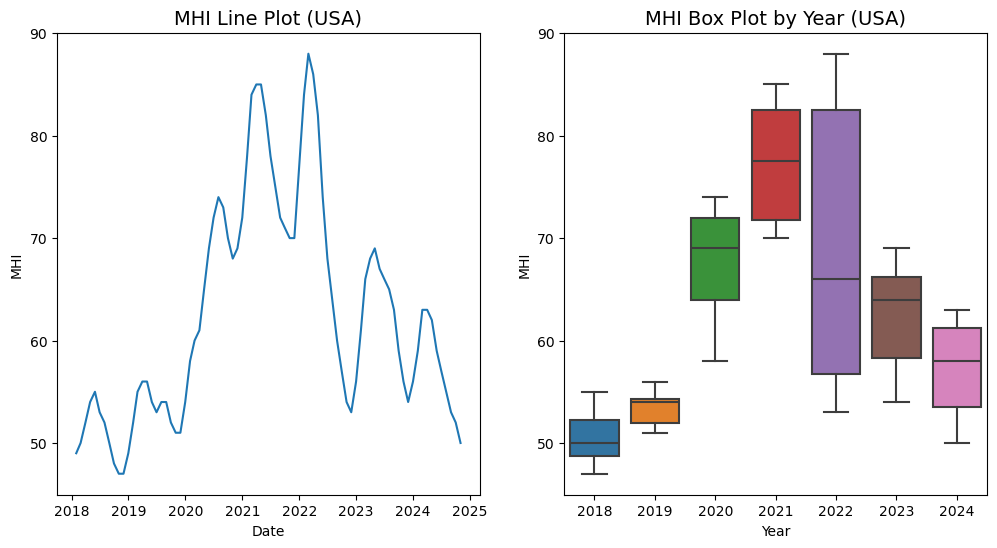

In [41]:
# Filter out all data not USA
df_mhi_us = df_mhi.loc[df_mhi['RegionName'] == 'United States']
df_zhvi_us = df_zhvi.loc[df_zhvi['RegionName'] == 'United States']
# Create a year column
df_mhi_us['Year'] = df_mhi_us['Date'].dt.year
df_zhvi_us['Year'] = df_mhi_us['Date'].dt.year
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Line Plot
plt.subplot(1, 2, 1)
sns.lineplot(y='MHI', x='Date', data=df_mhi_us)
plt.title('MHI Line Plot (USA)', fontsize=14)

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='MHI', data=df_mhi_us)
plt.title('MHI Box Plot by Year (USA)', fontsize=14)

plt.show()

C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\3401008423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zhvi_us['Year'] = df_zhvi_us['Date'].dt.year
C:\Users\samdk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\samdk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


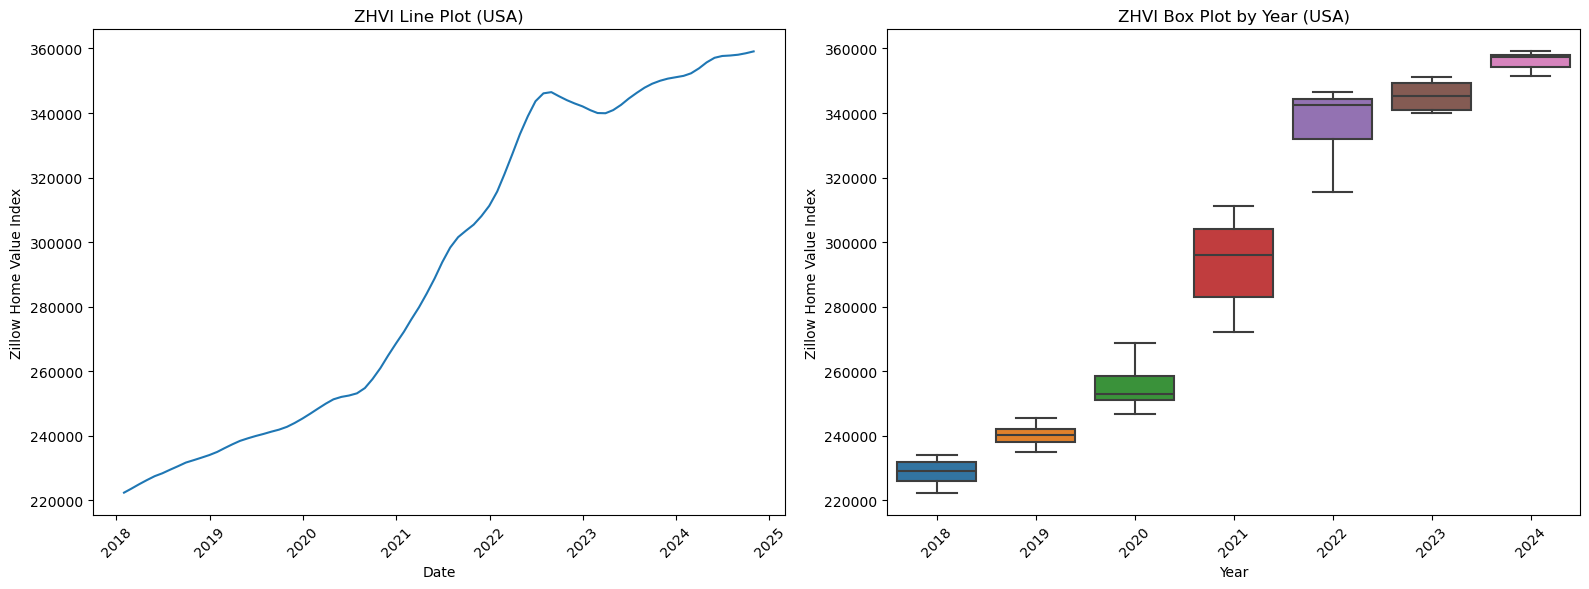

In [42]:
# Filter out all data not USA
df_zhvi_us = df_zhvi.loc[df_zhvi['RegionName'] == 'United States']

# Create year columns (note the correction for ZHVI dates)
df_zhvi_us['Year'] = df_zhvi_us['Date'].dt.year
df_zhvi_us = df_zhvi_us.loc[df_zhvi_us['Year'] >= 2018]
# Create a figure with four subplots
plt.figure(figsize=(16, 6))


# ZHVI Line Plot
plt.subplot(1, 2, 1)
sns.lineplot(y='ZHVI', x='Date', data=df_zhvi_us)
plt.title('ZHVI Line Plot (USA)', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Zillow Home Value Index')
plt.xticks(rotation=45)

# ZHVI Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='ZHVI', data=df_zhvi_us)
plt.title('ZHVI Box Plot by Year (USA)', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Zillow Home Value Index')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## MHI Analysis
From the line graph, there is a trend that the MHI has an annual maximum in the summer and minimum in the winter. From the both plot we can see a spike in the MHI by year in 2021 and a slow decline in 2022, 2023 and 2024. 

## Joining the Data
Joining the data together using the merge function on "date" and "regionname". This creates a dataframe with all of the continuous variables and the date/metro. Now we can see how the various things like ZHVI, inventory, median time til pending, median time to close and market heat index are comparable.

In [37]:
df_joined = pd.merge(df_zhvi, df_inventory, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_pending, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_close, on=['Date', 'RegionName'])
df_joined = pd.merge(df_joined, df_mhi, on=['Date', 'RegionName'])
print(df_joined.shape)
print(df_joined.info())
df_joined = df_joined.drop_duplicates()
print(df_joined.shape)
df_joined.head()

(47874, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47874 entries, 0 to 47873
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionName   47874 non-null  object        
 1   Date         47874 non-null  datetime64[ns]
 2   ZHVI         47859 non-null  float64       
 3   Inventory    47850 non-null  float64       
 4   Med_Pending  37097 non-null  float64       
 5   Med_Close    34373 non-null  float64       
 6   MHI          47725 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.6+ MB
None
(47874, 7)


,RegionName,Date,ZHVI,Inventory,Med_Pending,Med_Close,MHI
0,United States,2018-03-31,"224,910.29","1,421,530.00",31.00,31.00,52.00
1,"New York, NY",2018-03-31,"469,485.04","73,707.00",58.00,49.00,55.00
2,"Los Angeles, CA",2018-03-31,"611,069.36","21,998.00",17.00,30.00,65.00
3,"Chicago, IL",2018-03-31,"228,502.14","38,581.00",32.00,39.00,51.00
4,"Dallas, TX",2018-03-31,"237,191.56","24,043.00",27.00,19.00,58.00


# ZHVI Forward Growth Rate
I want to create a new column, a 1 year growth rate for ZHVI. This is forward looking, meaning its how much the ZHVI in a particular area will grow from the current date to 1 year in the future. To do this I'm going to set the date column as the index, group the columns together by metro and then look for the date exactly 1 year in the future and compare the ZHVI. 

In [9]:
def calculate_grouped_annual_growth_rate(df, value_column='ZHVI', group_column='RegionName'):
    df.set_index('Date', inplace=True)
    # Create a function to calculate growth rate for each group
    def calculate_group_growth_rate(group):
        group[f'{value_column}_forward_annual_growth_rate'] = (
            group[value_column].shift(-12) / group[value_column] - 1
        ) * 100
        return group
    
    # Apply the growth rate calculation to each group
    df_with_growth = df.groupby(group_column, group_keys=False).apply(calculate_group_growth_rate)
    
    return df_with_growth

df_final2 = calculate_grouped_annual_growth_rate(df_joined)
print(df_final2.info())
df_final2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47874 entries, 2018-03-31 to 2024-09-30
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RegionName                       47874 non-null  object 
 1   ZHVI                             47859 non-null  float64
 2   Inventory                        47850 non-null  float64
 3   Med_Pending                      37097 non-null  float64
 4   Med_Close                        34373 non-null  float64
 5   MHI                              47725 non-null  float64
 6   ZHVI_forward_annual_growth_rate  40576 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.9+ MB
None


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI,ZHVI_forward_annual_growth_rate
Date,,,,,,,
2018-03-31,"Aberdeen, WA","174,903.99",501.00,49.00,38.00,53.00,12.71
2018-03-31,"Abilene, TX","130,584.03",856.00,44.00,24.00,42.00,4.73
2018-03-31,"Ada, OK","112,180.44",223.00,NaN,NaN,12.00,-1.14
2018-03-31,"Adrian, MI","143,294.71",400.00,45.00,30.00,48.00,4.27
2018-03-31,"Akron, OH","137,531.47","3,198.00",50.00,22.00,42.00,6.15


# Final Cleaning
The whole point of this is to calculate our own growth rate and see if there are any "single" data points that compare to this. Doing multiple columns and doing a regression is outside the scope of this class but I think a correlation matrix and heatmap are within the bounds. We do need to drop null values.

In [10]:
df_final2.dropna(how='any', inplace=True)
print(df_final2.shape)
print(df_final2.info())
df_final2.head()

(27174, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27174 entries, 2018-03-31 to 2023-09-30
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RegionName                       27174 non-null  object 
 1   ZHVI                             27174 non-null  float64
 2   Inventory                        27174 non-null  float64
 3   Med_Pending                      27174 non-null  float64
 4   Med_Close                        27174 non-null  float64
 5   MHI                              27174 non-null  float64
 6   ZHVI_forward_annual_growth_rate  27174 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.7+ MB
None


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI,ZHVI_forward_annual_growth_rate
Date,,,,,,,
2018-03-31,"Aberdeen, WA","174,903.99",501.00,49.00,38.00,53.00,12.71
2018-03-31,"Abilene, TX","130,584.03",856.00,44.00,24.00,42.00,4.73
2018-03-31,"Adrian, MI","143,294.71",400.00,45.00,30.00,48.00,4.27
2018-03-31,"Akron, OH","137,531.47","3,198.00",50.00,22.00,42.00,6.15
2018-03-31,"Albany, NY","217,803.28","2,515.00",52.00,45.00,51.00,4.01


# Heatmap Visualization

I'm creating correlation matrix and a heatmap off of it. I want to see which of the various variables is best correlated with the "forward annual growth rate." I'll use this to narrow down where we should invest.

<Axes: >

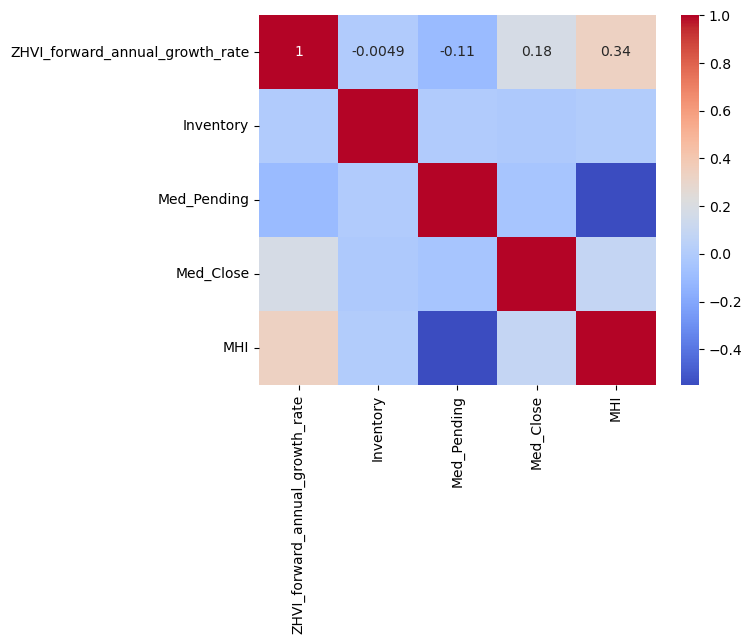

In [11]:
import seaborn as sns
df_final3_heat = df_final2[['ZHVI_forward_annual_growth_rate', 'Inventory', 'Med_Pending', 'Med_Close', 'MHI']]
correlation_matrix = df_final3_heat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


## Data Analysis
Its looking ike the Heat Index data is best correlated with yearly price growth. Median time to close is a close second. Median time to pending is negatively correlated (?) and inventory seems to have no correlation. What we're going to do is look for areas with a high "heat index" value and invest in those areas.

In [12]:
print(df_joined.index.max())
sorted_final_df = df_joined.loc[df_joined.index == df_joined.index.max()].sort_values(by='MHI', ascending=False)
sorted_final_df['ZHVI'] = sorted_final_df['ZHVI'].astype(float)
print(sorted_final_df.shape)
top_10_metros = sorted_final_df.head(10)
display(top_10_metros.head(10))

2024-09-30 00:00:00
(606, 6)


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI
Date,,,,,,
2024-09-30,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00
2024-09-30,"Syracuse, NY","235,312.45","1,218.00",7.00,63.00,86.00
2024-09-30,"Baraboo, WI","311,333.61",230.00,16.00,27.00,85.00
2024-09-30,"San Jose, CA","1,567,815.87","2,483.00",13.00,24.00,82.00
2024-09-30,"Hartford, CT","359,421.64","2,073.00",7.00,37.00,82.00
2024-09-30,"Buffalo, NY","261,056.01","2,157.00",12.00,59.00,82.00
2024-09-30,"Batavia, NY","205,987.50",88.00,14.00,49.00,80.00
2024-09-30,"Parkersburg, WV","163,707.19",233.00,14.00,33.00,79.00
2024-09-30,"Dixon, IL","160,678.75",70.00,14.00,41.00,79.00


# Zooming In from Metro to Zip Code
Metro area isn't enough. In the twin cities, there are great and terrible real estate investment opportunities. So while the analysis so far is good for narrowing things down, we want more granular geographic data. 

Unfortunately a lof of the data lacks geographical granularity beyond Metro Area. So we cannot compare the MHIs on a zip to zip level. What we're going to do is look at the zip codes in these high MHI metro areas and try to focus our investment in the "best" ones.

In [13]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvf_zip_all.csv')
display(df.head())
dim_zip = df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']]
dim_zip.loc[dim_zip['RegionName'] == 55318].head()
metro_list = dim_zip['Metro'].unique().tolist()
mn_metro_list = [metro for metro in metro_list if 'MN' in str(metro)]
print(mn_metro_list)
display(df_final2.head())
print(df_final2['RegionName'].value_counts())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2024-10-31,0.00,-0.20,0.60
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2024-10-31,0.40,0.60,1.80
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-10-31,-0.30,-0.80,0.30
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2024-10-31,-0.10,-0.30,0.50
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2024-10-31,-0.20,-0.60,0.40


['Minneapolis-St. Paul-Bloomington, MN-WI', 'Rochester, MN', 'Mankato, MN', 'La Crosse-Onalaska, WI-MN', 'Fargo, ND-MN', 'Grand Forks, ND-MN', 'St. Cloud, MN', 'Winona, MN', 'Bemidji, MN', 'Brainerd, MN', 'Faribault-Northfield, MN', 'Austin, MN', 'Owatonna, MN', 'Duluth, MN-WI', 'Alexandria, MN', 'Willmar, MN', 'Albert Lea, MN', 'Fergus Falls, MN', 'Red Wing, MN', 'Hutchinson, MN', 'New Ulm, MN', 'Marshall, MN', 'Worthington, MN', 'Wahpeton, ND-MN', 'Grand Rapids, MN']


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI,ZHVI_forward_annual_growth_rate
Date,,,,,,,
2018-03-31,"Aberdeen, WA","174,903.99",501.00,49.00,38.00,53.00,12.71
2018-03-31,"Abilene, TX","130,584.03",856.00,44.00,24.00,42.00,4.73
2018-03-31,"Adrian, MI","143,294.71",400.00,45.00,30.00,48.00,4.27
2018-03-31,"Akron, OH","137,531.47","3,198.00",50.00,22.00,42.00,6.15
2018-03-31,"Albany, NY","217,803.28","2,515.00",52.00,45.00,51.00,4.01


RegionName
Aberdeen, WA                67
Palatka, FL                 67
Myrtle Beach, SC            67
Napa, CA                    67
Naples, FL                  67
New Bern, NC                67
New Haven, CT               67
New York, NY                67
Newport, OR                 67
North Port, FL              67
Norwich, CT                 67
Ocala, FL                   67
Ocean City, NJ              67
Oklahoma City, OK           67
Orlando, FL                 67
Oxnard, CA                  67
Palm Bay, FL                67
Jefferson, GA               67
Panama City, FL             67
Parkersburg, WV             67
Payson, AZ                  67
Peoria, IL                  67
Philadelphia, PA            67
Phoenix, AZ                 67
Pinehurst, NC               67
Pittsfield, MA              67
Port Angeles, WA            67
Portland, ME                67
Providence, RI              67
Punta Gorda, FL             67
Reading, PA                 67
Richmond, KY                

# Zip Codes Continued
**SOME** metro areas have different names in "metro" dataset and "zip" dataset so unfortunately we can't just do a join on metro to zoom in. I'm going to do some more manual cleaning of the metro key data. The areas of interest in the metro key are all just City, State combinations. Here's what I'm going to do:

- In my Zip dataset, dim_zip, make a new column "Metro_Key" which is City, State
- Left Join the Metro dataset using "RegionName" to "Metro_Key" in the dim_zip dataset and pull the resulting "Metro" areas from the dim_zip dataset. Any zip associated with the metro area from dim zip will be joined to the metro dataset
- Pull all zips associated with my "top 10" Metros
- Join the forecasting table and see which zips have good 1M, 3M and 12M forecasts.

In [14]:
#make metro key
dim_zip['Metro_Metro_Key'] = dim_zip['City'].astype(str) + ', ' + dim_zip['StateName'].astype(str)
dim_zip_key = dim_zip[['Metro_Metro_Key', 'Metro']]
dim_zip_key.rename(columns = {'Metro':'Metro_Zip_Key'}, inplace=True)
dim_zip_key.drop_duplicates(inplace=True)
#do a join and verify dataset attributes
zip_metro_join = pd.merge(sorted_final_df, dim_zip_key, left_on = 'RegionName', right_on='Metro_Metro_Key', how='left')
print(sorted_final_df.shape)
print(dim_zip_key.shape)
print(zip_metro_join.shape)
print(zip_metro_join.info())
zip_metro_key = zip_metro_join[['Metro_Metro_Key', 'Metro_Zip_Key']]
display(zip_metro_key.head())
print(zip_metro_key.shape)
#print(zip_metro_key['Metro_Metro_Key'].value_counts())
zip_metro_key.drop_duplicates(inplace=True)
print(zip_metro_key.shape)
value_counts = zip_metro_key['Metro_Metro_Key'].value_counts()
print(value_counts)



(606, 6)
(14578, 2)
(612, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RegionName       612 non-null    object 
 1   ZHVI             612 non-null    float64
 2   Inventory        612 non-null    float64
 3   Med_Pending      607 non-null    float64
 4   Med_Close        611 non-null    float64
 5   MHI              611 non-null    float64
 6   Metro_Metro_Key  591 non-null    object 
 7   Metro_Zip_Key    591 non-null    object 
dtypes: float64(5), object(3)
memory usage: 38.4+ KB
None


C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\738407470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dim_zip['Metro_Metro_Key'] = dim_zip['City'].astype(str) + ', ' + dim_zip['StateName'].astype(str)
C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\738407470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dim_zip_key.rename(columns = {'Metro':'Metro_Zip_Key'}, inplace=True)
C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\738407470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,Metro_Metro_Key,Metro_Zip_Key
0,"Rochester, NY","Rochester, NY"
1,"Syracuse, NY","Syracuse, NY"
2,"Baraboo, WI","Baraboo, WI"
3,"San Jose, CA","San Jose-Sunnyvale-Santa Clara, CA"
4,"Hartford, CT","Hartford-East Hartford-Middletown, CT"


(612, 2)
(592, 2)
Metro_Metro_Key
Holland, MI               2
Mount Airy, NC            2
Albany, OR                2
Bloomington, IN           2
Lubbock, TX               2
Carson City, NV           2
Rochester, NY             1
Lewisburg, TN             1
Poplar Bluff, MO          1
Bloomsburg, PA            1
Edwards, CO               1
Moses Lake, WA            1
Idaho Falls, ID           1
Clarksville, TN           1
Rexburg, ID               1
North Port, FL            1
Shreveport, LA            1
Big Rapids, MI            1
Ocala, FL                 1
Coldwater, MI             1
Athens, TN                1
Lafayette, IN             1
Kingsport, TN             1
Coeur d'Alene, ID         1
Fort Collins, CO          1
Jacksonville, FL          1
Midland, TX               1
Fort Smith, AR            1
Red Bluff, CA             1
Joplin, MO                1
Montrose, CO              1
Palm Bay, FL              1
Findlay, OH               1
Sandusky, OH              1
Hilton Head Is

C:\Users\samdk\AppData\Local\Temp\ipykernel_18184\738407470.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_metro_key.drop_duplicates(inplace=True)


# Zip Codes Continued
I need to investigate why a few have multiple after dropping duplicates. Specifically:
- Lubbock, TX
- Carson City, NV
- Bloomington, IN
- Albany, OR
- Holland, MI  

In [15]:
dbl_list = metro_key_list = value_counts[value_counts == 2].index.tolist()
print(dbl_list)
zip_metro_key[zip_metro_key['Metro_Metro_Key'].isin(dbl_list)].head(15)

['Holland, MI', 'Mount Airy, NC', 'Albany, OR', 'Bloomington, IN', 'Lubbock, TX', 'Carson City, NV']


,Metro_Metro_Key,Metro_Zip_Key
152,"Holland, MI","Grand Rapids-Kentwood, MI"
153,"Holland, MI","Holland, MI"
187,"Albany, OR","Albany-Lebanon, OR"
188,"Albany, OR","Corvallis, OR"
243,"Carson City, NV","Carson City, NV"
244,"Carson City, NV","Gardnerville Ranchos, NV"
548,"Bloomington, IN","Bloomington, IN"
549,"Bloomington, IN","Bedford, IN"
555,"Lubbock, TX","Lubbock, TX"
556,"Lubbock, TX","Levelland, TX"


# Zip Codes Continued
We're have metro from metro now associated with correct metro from zip.

# Zip Codes Continued
I have my top 10 Metro areas stored in top_10_metros, If I want more granular data (by zip code) I need to use my zip_metro_key to join zip codes to these metros.

In [16]:
top_10_metros_with_key = pd.merge(top_10_metros, zip_metro_key, how='left', left_on = "RegionName", right_on = 'Metro_Metro_Key')
print(top_10_metros_with_key.shape)
display(top_10_metros_with_key.head(10))



(10, 8)


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI,Metro_Metro_Key,Metro_Zip_Key
0,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY"
1,"Syracuse, NY","235,312.45","1,218.00",7.00,63.00,86.00,"Syracuse, NY","Syracuse, NY"
2,"Baraboo, WI","311,333.61",230.00,16.00,27.00,85.00,"Baraboo, WI","Baraboo, WI"
3,"San Jose, CA","1,567,815.87","2,483.00",13.00,24.00,82.00,"San Jose, CA","San Jose-Sunnyvale-Santa Clara, CA"
4,"Hartford, CT","359,421.64","2,073.00",7.00,37.00,82.00,"Hartford, CT","Hartford-East Hartford-Middletown, CT"
5,"Buffalo, NY","261,056.01","2,157.00",12.00,59.00,82.00,"Buffalo, NY","Buffalo-Cheektowaga, NY"
6,"Batavia, NY","205,987.50",88.00,14.00,49.00,80.00,"Batavia, NY","Batavia, NY"
7,"Parkersburg, WV","163,707.19",233.00,14.00,33.00,79.00,"Parkersburg, WV","Parkersburg-Vienna, WV"
8,"Dixon, IL","160,678.75",70.00,14.00,41.00,79.00,"Dixon, IL","Dixon, IL"
9,"Lewiston, ME","318,380.67",226.00,8.00,36.00,79.00,"Lewiston, ME","Lewiston-Auburn, ME"


# Zip Codes Continued
Baraboo, Batavia and Dixon don't have metro_metro_key values. Lets look into the zip code dataset and figure out why this is.

Figured out I was joining the wrong table to create "zip_metro_join" (This is now fixed and won't be visible but I'm keeping the code/troubleshooting).

In [17]:
# check dim_zip
print('dim_zip')
display(dim_zip.loc[dim_zip['City'] == 'Baraboo'].head())
# check dim_zip_key
print('dim_zip_key')
display(dim_zip_key.loc[dim_zip_key['Metro_Metro_Key'] == 'Baraboo, WI'].head())
# check zip_metro_join
print('zip_metro_join')
display(zip_metro_join.loc[zip_metro_join['Metro_Metro_Key'] == 'Baraboo, WI'].head())
# check zip_metro_key
print('zip_metro_key')
display(zip_metro_key.loc[zip_metro_key['Metro_Metro_Key'] == 'Baraboo, WI'].head())
#zip_metro_key.loc[zip_metro_key['Metro_Metro_Key']== 'Baraboo, WI'].head()

dim_zip


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Metro_Metro_Key
5736,81479,5849,53913,zip,WI,WI,Baraboo,"Baraboo, WI",Sauk County,"Baraboo, WI"


dim_zip_key


,Metro_Metro_Key,Metro_Zip_Key
5736,"Baraboo, WI","Baraboo, WI"


zip_metro_join


,RegionName,ZHVI,Inventory,Med_Pending,Med_Close,MHI,Metro_Metro_Key,Metro_Zip_Key
2,"Baraboo, WI","311,333.61",230.00,16.00,27.00,85.00,"Baraboo, WI","Baraboo, WI"


zip_metro_key


,Metro_Metro_Key,Metro_Zip_Key
2,"Baraboo, WI","Baraboo, WI"


# Zip Continued
Now I need to join zip code data from the zip data set to the "top 10" data set using Metro_Zip_Key from the "top 10" dataset and "metro" from the zip data set. 

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvf_zip_all.csv')
df_top_10_with_zip = pd.merge(top_10_metros_with_key, df, left_on = 'Metro_Zip_Key', right_on = 'Metro', suffixes=('_metro', '_zip'))
print(df_top_10_with_zip.shape)
print(df_top_10_with_zip.columns)
df_top_10_with_zip[['ZHVI']]
df_top_10_with_zip.head(464)

(464, 21)
Index(['RegionName_metro', 'ZHVI', 'Inventory', 'Med_Pending', 'Med_Close',
       'MHI', 'Metro_Metro_Key', 'Metro_Zip_Key', 'RegionID', 'SizeRank',
       'RegionName_zip', 'RegionType', 'StateName', 'State', 'City', 'Metro',
       'CountyName', 'BaseDate', '2024-11-30', '2025-01-31', '2025-10-31'],
      dtype='object')


,RegionName_metro,ZHVI,Inventory,Med_Pending,Med_Close,MHI,Metro_Metro_Key,Metro_Zip_Key,RegionID,SizeRank,RegionName_zip,RegionType,StateName,State,City,Metro,CountyName,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63615,738,14580,zip,NY,NY,Webster,"Rochester, NY",Monroe County,2024-10-31,0.30,0.50,3.00
1,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63531,1556,14450,zip,NY,NY,Fairport,"Rochester, NY",Monroe County,2024-10-31,0.50,0.90,3.20
2,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63630,1801,14609,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.10,0.50,3.20
3,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63645,2396,14624,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.30,0.50,3.20
4,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63633,2861,14612,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.30,0.40,3.00
5,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63586,3093,14534,zip,NY,NY,Pittsford,"Rochester, NY",Monroe County,2024-10-31,0.50,1.00,3.10
6,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63642,3152,14621,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.30,0.60,3.40
7,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63647,3575,14626,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.20,0.40,3.10
8,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63627,4094,14606,zip,NY,NY,Rochester,"Rochester, NY",Monroe County,2024-10-31,0.20,0.50,3.20
9,"Rochester, NY","251,954.29","1,748.00",8.00,45.00,134.00,"Rochester, NY","Rochester, NY",63517,4216,14424,zip,NY,NY,Canandaigua,"Rochester, NY",Ontario County,2024-10-31,0.20,0.30,2.80


In [19]:
df_finals = df_top_10_with_zip[['State', 'Metro','City', 'CountyName', 'RegionName_zip', 'ZHVI', 'Inventory', 'Med_Pending',
'Med_Close', 'MHI', 'BaseDate', '2024-11-30', '2025-01-31', '2025-10-31']]
df_finals.head(464)

,State,Metro,City,CountyName,RegionName_zip,ZHVI,Inventory,Med_Pending,Med_Close,MHI,BaseDate,2024-11-30,2025-01-31,2025-10-31
0,NY,"Rochester, NY",Webster,Monroe County,14580,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.30,0.50,3.00
1,NY,"Rochester, NY",Fairport,Monroe County,14450,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.50,0.90,3.20
2,NY,"Rochester, NY",Rochester,Monroe County,14609,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.10,0.50,3.20
3,NY,"Rochester, NY",Rochester,Monroe County,14624,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.30,0.50,3.20
4,NY,"Rochester, NY",Rochester,Monroe County,14612,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.30,0.40,3.00
5,NY,"Rochester, NY",Pittsford,Monroe County,14534,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.50,1.00,3.10
6,NY,"Rochester, NY",Rochester,Monroe County,14621,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.30,0.60,3.40
7,NY,"Rochester, NY",Rochester,Monroe County,14626,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.20,0.40,3.10
8,NY,"Rochester, NY",Rochester,Monroe County,14606,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.20,0.50,3.20
9,NY,"Rochester, NY",Canandaigua,Ontario County,14424,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,0.20,0.30,2.80


In [20]:
#send to csv for others use
zip_metro_key.to_csv('metro_zip_key.csv', index=False)

# Zip Join Finished
Now we have top 10 data with associated zipcode and can look at things on a "per zip" basis where that data exists. Data that goes down to the zip level includes ZHVI, ZHVF, ZORI for all homes. The df_finals dataset has projected growth on the 1M, 3M and 12M timeframe. Lets sort those and pick some specific zip codes. I want to see my top 10 hottest metro areas with a violin chart for forecasted growth for each zip code.

# 1M Projected Growth
I'm pulling the 1M projected growth from the top 10 "hottest" Metro areas.

,State,Metro,City,CountyName,RegionName_zip,ZHVI,Inventory,Med_Pending,Med_Close,MHI,BaseDate,2024-11-30,2025-01-31,2025-10-31
331,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6103,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,2.10,3.50,4.30
94,NY,"Rochester, NY",Lakeville,Livingston County,14480,"251,954.29","1,748.00",8.00,45.00,134.00,2024-10-31,1.00,1.60,4.10
280,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6120,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,0.90,2.00,3.80
269,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6105,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,0.90,2.00,2.90
245,CA,"San Jose-Sunnyvale-Santa Clara, CA",NaN,Santa Clara County,94304,"1,567,815.87","2,483.00",13.00,24.00,82.00,2024-10-31,0.90,0.50,0.50


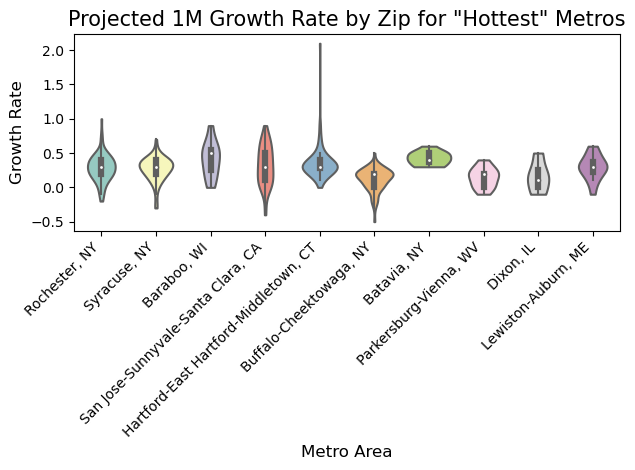

In [21]:
zip_growth_1M = df_finals.sort_values(by='2024-11-30', ascending=False)
display(zip_growth_1M.head(5))

sns.violinplot(x='Metro', y='2024-11-30', data=df_finals, 
               cut=0,        # Limit the violin plot to the actual data range
               palette="Set3" # Color palette
              )
plt.title('Projected 1M Growth Rate by Zip for "Hottest" Metros', fontsize=15)
plt.xlabel('Metro Area', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align to right
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

# 3M Projected Growth
Let's do the same with 3M...

,State,Metro,City,CountyName,RegionName_zip,ZHVI,Inventory,Med_Pending,Med_Close,MHI,BaseDate,2024-11-30,2025-01-31,2025-10-31
331,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6103,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,2.10,3.50,4.30
269,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6105,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,0.90,2.00,2.90
280,CT,"Hartford-East Hartford-Middletown, CT",Hartford,Hartford County,6120,"359,421.64","2,073.00",7.00,37.00,82.00,2024-10-31,0.90,2.00,3.80
463,ME,"Lewiston-Auburn, ME",Livermore,Androscoggin County,4253,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,0.50,1.90,5.00
182,WI,"Baraboo, WI",North Freedom,Sauk County,53951,"311,333.61",230.00,16.00,27.00,85.00,2024-10-31,0.90,1.90,2.90


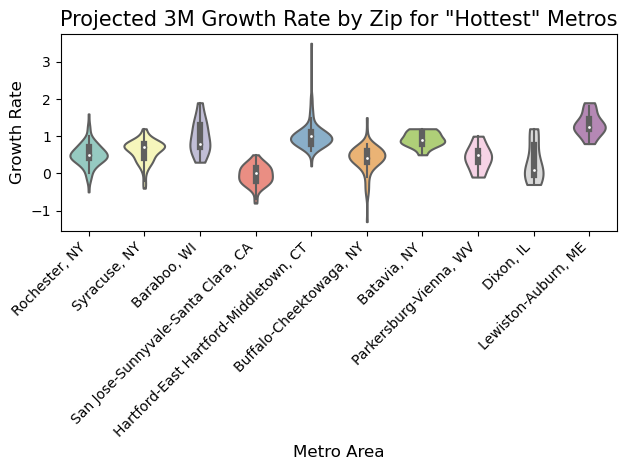

In [22]:
zip_growth_3M = df_finals.sort_values(by='2025-01-31', ascending=False)
display(zip_growth_3M.head(5))

sns.violinplot(x='Metro', y='2025-01-31', data=df_finals, 
               cut=0,        # Limit the violin plot to the actual data range
               palette="Set3" # Color palette
              )
plt.title('Projected 3M Growth Rate by Zip for "Hottest" Metros', fontsize=15)
plt.xlabel('Metro Area', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align to right
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

# 12 M Projected Growth
And 12 month...

,State,Metro,City,CountyName,RegionName_zip,ZHVI,Inventory,Med_Pending,Med_Close,MHI,BaseDate,2024-11-30,2025-01-31,2025-10-31
459,ME,"Lewiston-Auburn, ME",Livermore Falls,Androscoggin County,4254,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,-0.10,1.30,5.60
463,ME,"Lewiston-Auburn, ME",Livermore,Androscoggin County,4253,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,0.50,1.90,5.00
462,ME,"Lewiston-Auburn, ME",Leeds,Androscoggin County,4263,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,0.50,1.80,4.90
457,ME,"Lewiston-Auburn, ME",Lisbon,Androscoggin County,4250,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,0.40,1.40,4.80
461,ME,"Lewiston-Auburn, ME",Mechanic Falls,Androscoggin County,4256,"318,380.67",226.00,8.00,36.00,79.00,2024-10-31,0.20,1.50,4.70


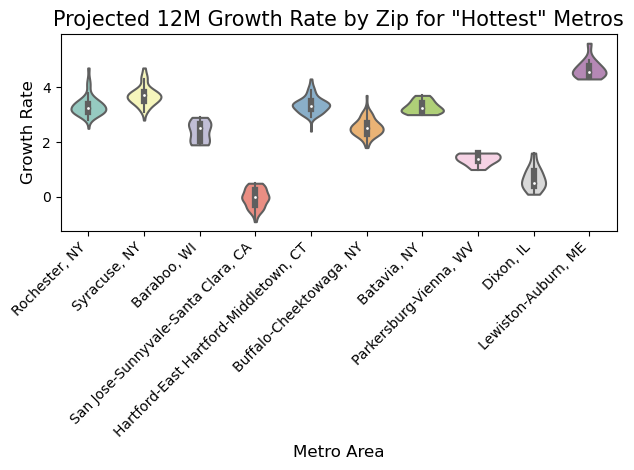

In [23]:
zip_growth_12M = df_finals.sort_values(by='2025-10-31', ascending=False)
display(zip_growth_12M.head(5))

sns.violinplot(x='Metro', y='2025-10-31', data=df_finals, 
               cut=0,        # Limit the violin plot to the actual data range
               palette="Set3" # Color palette
              )
plt.title('Projected 12M Growth Rate by Zip for "Hottest" Metros', fontsize=15)
plt.xlabel('Metro Area', fontsize=12)
plt.ylabel('Growth Rate', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees, align to right
plt.tight_layout()  # Adjust layout to prevent cutting off labels
plt.show()

# Growth Rate Conclusion
We're at a decision point. Based off of investing for property value growth rates, we want to invest in the Lewiston-Auburn, ME metro. In zip codes 4253, 4254, 4263, 4250, and 4256. This metro is hot, has low time to sale and pending. Lower inventory. These zip codes have a high projected growth rate. Homes are inexpensive here. 

# Investibility Index
If we're investing in an area there are two ways to make money, from rent or from appreciation. I want to visualize what the price level is on a property, what can be made from rent and forecasted appreciation on the same graph. To do that I'm going to gather data by zip code and combine ZHVI and ZORI into a single value (divide ZORI which is should track to revenue by ZHVI which tracks to cost) and plot against Projected 12M growth rate.

With this analysis we're interested in ZORI/ZHVI values from the **most recent** time period only. 

## ZHVI by Zip First

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvi_zip_all_post_2018.csv')
print(df.shape)
print(df['RegionType'].unique())
display(df.head())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
df.rename(columns={'RegionName':'Zip'}, inplace=True)
df_zhvi_zip = df.melt(id_vars = ['Zip'], var_name = 'Date', value_name = 'ZHVI').astype({'Date':'datetime64[ns]', 'Zip':'str'})
print(df_zhvi_zip.shape)
print(df_zhvi_zip.info())
print(df_zhvi_zip.isna().sum())
df_zhvi_zip.head()

(26333, 79)
['zip']


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"322,412.74","323,014.71","323,614.46","324,171.82","324,402.28","324,340.88","323,998.77","323,496.51","323,385.06","323,566.88","324,190.85","325,030.80","326,218.28","327,442.62","328,432.44","328,887.19","328,791.49","328,498.53","328,552.11","329,451.26","331,401.14","334,153.52","337,736.97","341,710.10","346,152.28","351,120.19","356,914.25","363,701.27","371,378.46","379,360.19","386,865.50","393,302.62","398,629.95","403,733.90","409,438.41","415,449.72","422,727.65","431,057.53","441,539.54","453,126.06","464,883.49","475,160.01","481,266.50","482,476.91","480,186.59","477,280.31","475,083.44","473,566.85","471,374.60","470,083.40","469,054.88","470,257.34","472,247.19","475,351.13","478,127.56","480,590.27","482,400.41","483,633.70","484,320.57","484,931.52","486,299.82","488,450.03","491,246.37","493,753.58","495,060.15","495,365.13","494,987.72","495,393.29","496,081.01","497,199.84"
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,"337,262.16","337,322.60","337,052.77","337,140.28","336,797.65","336,748.64","335,702.54","334,618.99","333,334.95","333,194.36","334,248.24","335,273.18","336,873.38","338,372.77","341,149.07","342,911.40","343,406.53","342,165.76","341,351.66","341,890.61","344,539.71","348,842.30","354,810.81","361,382.86","367,166.74","372,016.00","376,285.77","381,906.51","388,891.36","397,028.40","404,092.76","410,359.73","416,012.17","422,837.13","430,396.26","437,925.33","447,447.75","458,422.51","471,314.25","482,992.86","493,525.81","503,437.51","511,196.39","516,355.28","518,618.98","520,542.86","523,366.16","526,375.74","528,751.48","530,975.71","533,880.15","538,057.44","543,448.00","549,421.33","555,565.18","561,494.57","567,857.09","575,241.87","582,084.57","586,881.92","588,475.42","591,048.71","596,177.34","604,530.12","611,916.24","617,370.08","622,270.01","627,535.39","633,736.08","639,283.60"
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,"184,357.06","185,096.81","185,699.40","186,073.68","186,380.56","186,656.97","186,984.99","187,400.85","187,832.89","188,375.52","189,135.86","190,134.19","191,122.27","191,819.64","192,325.69","192,616.08","192,648.35","192,699.92","193,052.42","193,970.53","195,365.69","197,309.25","199,821.03","202,504.94","205,217.18","207,798.36","210,578.96","213,657.93","217,408.95","221,799.35","225,996.15","229,598.17","232,631.25","235,917.18","239,574.11","243,409.03","248,227.34","253,862.36","260,400.01","266,957.22","273,291.31","279,035.67","283,232.63","285,246.66","285,411.17","284,428.35","283,059.45","281,028.14","278,622.26","276,303.56","274,464.41","273,281.73","272,806.77","273,181.85","273,934.98","274,822.49","275,350.81","275,340.71","275,108.27","274,820.26","275,170.81","275,862.59","276,945.30","277,892.64","278,419.52","278,380.31","278,149.01","277,969.71","277,784.00","277,372.92"
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"496,185.78","500,726.22","506,689.92","510,350.65","513,586.99","516,153.95","519,124.72","521,339.13","522,388.01","522,316.43

(1843310, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843310 entries, 0 to 1843309
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Zip     object        
 1   Date    datetime64[ns]
 2   ZHVI    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.2+ MB
None
Zip         0
Date        0
ZHVI    67632
dtype: int64


,Zip,Date,ZHVI
0,77494,2019-01-31,"322,412.74"
1,8701,2019-01-31,"337,262.16"
2,77449,2019-01-31,"184,357.06"
3,11368,2019-01-31,"496,185.78"
4,77084,2019-01-31,"179,689.87"


## ZORI (Rent Index) by ZIP

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zori_zip_all.csv')
print(df.shape)
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
df.rename(columns={'RegionName':'Zip'}, inplace=True)
display(df.head())
df_zori_zip = df.melt(id_vars = ['Zip'], var_name = 'Date', value_name = 'ZORI').astype({'Date':'datetime64[ns]', 'Zip':'str'})
print(df_zori_zip.shape)
print(df_zori_zip.info())
print(df_zori_zip.isna().sum())
df_zori_zip.head()

(7127, 127)


,Zip,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,77494,"1,555.28","1,559.55","1,567.95","1,574.86","1,580.44","1,582.32","1,589.43","1,586.69","1,581.95","1,571.10","1,563.69","1,542.89","1,536.47","1,523.69","1,535.46","1,524.17","1,524.78","1,521.03","1,522.25","1,519.97","1,509.12","1,499.50","1,482.78","1,468.86","1,468.83","1,486.53","1,503.23","1,510.54","1,517.19","1,524.69","1,524.26","1,512.16","1,519.56","1,532.44","1,549.97","1,550.28","1,561.12","1,567.93","1,572.88","1,568.57","1,566.15","1,565.44","1,559.86","1,547.71","1,533.86","1,528.46","1,533.91","1,539.93","1,549.63","1,555.25","1,566.26","1,571.75","1,572.12","1,569.77","1,569.34","1,578.43","1,574.22","1,574.16","1,568.80","1,572.03","1,575.50","1,584.49","1,590.31","1,600.60","1,592.24","1,592.49","1,583.78","1,593.79","1,606.89","1,603.97","1,613.48","1,614.60","1,635.27","1,636.67","1,643.44","1,660.04","1,692.23","1,735.75","1,772.63","1,802.55","1,816.83","1,829.59","1,843.74","1,853.71","1,860.10","1,865.82","1,874.27","1,895.70","1,919.76","1,944.84","1,961.73","1,964.01","1,962.27","1,957.21","1,939.41","1,935.79","1,948.29","1,958.36","1,969.98","1,952.57","1,963.32","1,970.41","1,981.90","1,988.39","1,989.86","1,986.92","1,961.90","1,946.29","1,935.57","1,957.52","1,970.90","1,994.47","1,998.26","2,012.37","2,015.98","2,025.53","2,013.82","2,004.03"
1,77449,"1,317.21","1,312.99","1,320.80","1,331.98","1,342.91","1,351.02","1,354.03","1,359.52","1,362.87","1,364.22","1,360.34","1,356.63","1,349.64","1,350.71","1,359.95","1,370.75","1,375.61","1,366.82","1,361.96","1,361.26","1,361.96","1,363.45","1,354.18","1,347.25","1,340.39","1,347.06","1,355.79","1,364.46","1,367.18","1,372.05","1,378.17","1,379.69","1,383.56","1,382.63","1,390.26","1,394.19","1,407.08","1,411.74","1,412.17","1,415.62","1,421.63","1,430.40","1,430.04","1,431.16","1,426.29","1,423.39","1,429.39","1,427.01","1,427.23","1,421.75","1,429.66","1,433.47","1,442.85","1,447.14","1,453.96","1,448.79","1,450.73","1,444.88","1,443.14","1,443.98","1,453.97","1,465.48","1,476.85","1,479.26","1,471.11","1,470.41","1,476.12","1,493.47","1,504.59","1,509.55","1,517.79","1,528.42","1,536.44","1,540.73","1,548.28","1,572.21","1,610.52","1,645.87","1,685.88","1,699.75","1,714.05","1,723.19","1,721.89","1,737.57","1,733.93","1,769.79","1,784.90","1,799.91","1,782.63","1,778.90","1,819.07","1,869.66","1,872.90","1,854.11","1,830.15","1,835.15","1,829.10","1,831.07","1,845.10","1,861.60","1,868.35","1,875.56","1,871.95","1,881.77","1,876.41","1,866.32","1,860.21","1,872.21","1,886.24","1,900.75","1,910.30","1,920.97","1,917.57","1,917.95","1,930.32","1,940.47","1,918.00","1,901.64"
2,11368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

(840986, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840986 entries, 0 to 840985
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Zip     840986 non-null  object        
 1   Date    840986 non-null  datetime64[ns]
 2   ZORI    329716 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 19.2+ MB
None
Zip          0
Date         0
ZORI    511270
dtype: int64


,Zip,Date,ZORI
0,77494,2015-01-31,"1,555.28"
1,77449,2015-01-31,"1,317.21"
2,11368,2015-01-31,NaN
3,77084,2015-01-31,"1,267.83"
4,79936,2015-01-31,NaN


## Forecasted Growth by Zip

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/samkrall/dataprepandanalysis/refs/heads/main/zhvf_zip_all.csv')
print(df.shape)
print(df['RegionType'].unique())
df.drop(columns=['RegionID', 'RegionType', 'StateName', 'SizeRank', 'State', 'City', 'Metro', 'CountyName'], inplace=True)
df.rename(columns={'RegionName':'Zip', 'BaseDate':'Date'}, inplace=True)
df_zhvf_zip = df
df_zhvf_zip['Date'] = df_zhvf_zip['Date'].astype('datetime64[ns]')
print(df_zhvf_zip.info())
display(df_zhvf_zip.head())

(20161, 13)
['zip']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20161 entries, 0 to 20160
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Zip         20161 non-null  int64         
 1   Date        20161 non-null  datetime64[ns]
 2   2024-11-30  20161 non-null  float64       
 3   2025-01-31  20161 non-null  float64       
 4   2025-10-31  20161 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 787.7 KB
None


,Zip,Date,2024-11-30,2025-01-31,2025-10-31
0,77494,2024-10-31,0.00,-0.20,0.60
1,8701,2024-10-31,0.40,0.60,1.80
2,77449,2024-10-31,-0.30,-0.80,0.30
3,11368,2024-10-31,-0.10,-0.30,0.50
4,77084,2024-10-31,-0.20,-0.60,0.40


## Joining ZHVI, ZORI, ZHVF

In [27]:
df_investibility = pd.merge(df_zhvi_zip, df_zori_zip, on = ['Zip', 'Date'])
print(df_investibility.shape)
print(df_investibility.isnull().sum())
df_investibility = pd.merge(df_zhvf_zip, df_investibility, on = ['Zip', 'Date'], how = 'left')
print(df_zhvf_zip.shape)
print(df_investibility.shape)
display(df_investibility.head())
print(df_zhvi_zip.loc[df_zhvi_zip['Zip']==8701].shape)
display(df_zhvi_zip.loc[df_zhvi_zip['Zip']==8701].head(70))



(497700, 4)
Zip          0
Date         0
ZHVI       202
ZORI    238182
dtype: int64


ValueError: You are trying to merge on int64 and object columns for key 'Zip'. If you wish to proceed you should use pd.concat

## Dealing with NA values
Look for NA values and drop if they exist. There's just not a good way of filling in na values by zip code. 

In [ ]:
print(df_investibility.isna().sum())
df_investibility.dropna(how='any', inplace=True)
df_investibility.shape

In [ ]:
df_investibility['RentRatio'] = df_investibility['ZORI']/df_investibility['ZHVI']*1000
display(df_investibility.head(25))
df_investibility.describe()

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(x="RentRatio",y="2025-10-31", data=df_investibility)
plt.title('Rent Ratio vs. 12M Growth', fontsize=15)
plt.xlabel('Rent Ratio', fontsize=12)
plt.ylabel('12M Growth', fontsize=12)

# Improve layout
plt.tight_layout()

In [ ]:
sns.kdeplot(x="RentRatio", y="2025-10-31", data=df_investibility, cmap='YlGnBu', fill=True, levels=10)


In [ ]:
sns.set_theme(style="white")


# Investibilty Continued
There's a big mass of Zip Codes that have growth rates projected to be below 5 and rent rations of less than 10. Lets see how many meet this criteria.

In [ ]:
rent_ratio_percentage_below = np.mean(df_investibility['RentRatio'] < 10) * 100
print(rent_ratio_percentage_below)
growth_rate_percentage_below = np.mean(df_investibility['2025-10-31'] < 5) * 100
print(growth_rate_percentage_below)

In [ ]:
growth_and_high_rent = df_investibility.loc[(df_investibility['RentRatio']>10) & (df_investibility['2025-10-31']>5)]
print(growth_and_high_rent.shape)
display(growth_and_high_rent.head())

# Investibilty Conclusion
Here are a couple of zip codes where we have high forecasted growth as well as high rent to price ratios. This means that we could realize nice gains on the price while easily paying the mortgage with rent and maybe getting some gains here too.



## Additional Tweaks

- General
    - Filling instead of dropping data
    - Removing outliers
    - Normalizing (0-1) or transformaing (logarithmically) data
- Metro
    - ZHVI by bedroom
    - ZORI/ZORDI by metro
- Zip
    - ZORI Zip
- Visuals
      - ZORI/ YoY Forecast / ZHVI
- Probably a bunch of others

# Forecast Analysis

Is the forecast generated by Zillow worth using? Should we be using this to determine "where" to invest?

